In [2]:
%matplotlib inline
import torch 
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
num_inputs=2
num_examples=1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)

<Figure size 800x800 with 0 Axes>

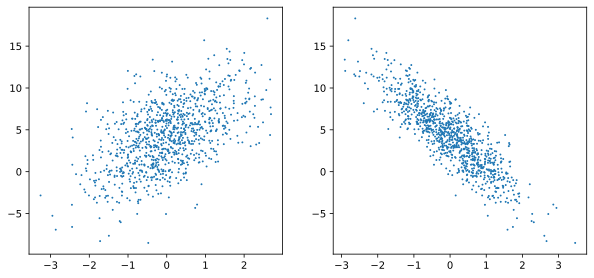

In [8]:
def use_svg_display():
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(10,10)):
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize
  plt.figure(dpi=80)

set_figsize()
plt.figure()
ax1 = plt.subplot(221)
plt.scatter(features[:,0].numpy(),labels.numpy(),1)
ax2 = plt.subplot(222)
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

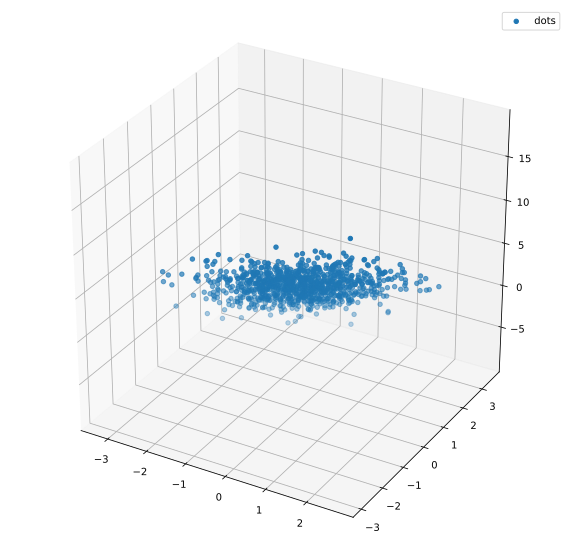

In [13]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize']=10
fig = plt.figure(1)
ax = fig.gca(projection='3d')
ax.scatter(features[:,0].numpy(),features[:,1].numpy(),labels.numpy(),label='dots')
ax.legend()
plt.show()

In [18]:
def data_iter(batch_size,features,labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0,num_examples,batch_size):
    j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])# 最后一次可能不足一个batch,所以终止到num_examples即可
    yield features.index_select(0,j),labels.index_select(0,j)

batch_size = 10
for X,Y in data_iter(batch_size,features,labels):
  print(X,Y)
  break

tensor([[ 0.3673,  1.2084],
        [-1.8989, -0.2920],
        [-1.1762, -1.1251],
        [-0.7447,  1.8470],
        [-0.3273,  0.1870],
        [ 1.2568, -0.5176],
        [ 0.3017, -0.2919],
        [-1.1084, -0.0786],
        [ 0.5898, -0.4698],
        [-0.4034,  1.2023]]) tensor([ 0.8234,  1.4107,  5.6874, -3.5595,  2.9119,  8.4741,  5.8133,  2.2631,
         6.9675, -0.6973])


In [25]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32,requires_grad=True)
b = torch.tensor(np.random.normal(0,0.01,(1)),dtype=torch.float32,requires_grad=True)
w

tensor([[0.0024],
        [0.0221]], requires_grad=True)

In [27]:
def linereg(X,w,b):
  return torch.mm(X,w)+b#定义生成y_hat的函数

def squared_loss(y_hat,y):
  return (y_hat-y.view(y_hat.size()))**2/2

def sgd(params, lr, batch_size):  
  for param in params:
    param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data


In [36]:
lr = 0.03
num_epochs = 100
net = linereg #生成输出的函数
loss = squared_loss

for epoch in range(num_epochs):
  for X,Y in data_iter(batch_size=10,features=features,labels=labels):
    l = loss(net(X,w,b),Y).sum()
    l.backward()
    sgd([w,b],lr,batch_size=10)
    w.grad.data.zero_()
    w.grad.data.zero_()
  train_l = loss(net(features,w,b),labels)
  print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))
  if(train_l.mean().item()<0.05):
    break;
print("trainning completed")
print(true_w, '\n', w)
print(true_b, '\n', b)

epoch 1, loss 11.521261
epoch 2, loss 0.390522
epoch 3, loss 10.735115
epoch 4, loss 1.144522
epoch 5, loss 10.706129
epoch 6, loss 2.072900
epoch 7, loss 9.344727
epoch 8, loss 3.457351
epoch 9, loss 7.826056
epoch 10, loss 4.533083
epoch 11, loss 6.090066
epoch 12, loss 6.234341
epoch 13, loss 4.606677
epoch 14, loss 8.121134
epoch 15, loss 3.801847
epoch 16, loss 10.027648
epoch 17, loss 2.481050
epoch 18, loss 11.669509
epoch 19, loss 1.228997
epoch 20, loss 12.981869
epoch 21, loss 0.362375
epoch 22, loss 13.641553
epoch 23, loss 0.015487
trainning completed
[2, -3.4] 
 tensor([[ 2.0300],
        [-3.5622]], requires_grad=True)
4.2 
 tensor([4.1250], requires_grad=True)
